In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import datetime as dt
import calendar
import matplotlib.pyplot as plt

In [2]:
gen19 = pd.read_csv('2019_GenMix.csv')
gen20 = pd.read_csv('2020_GenMix.csv')

copy19 = gen19.copy()
copy19.drop(['Unnamed: 0'], axis=1, inplace=True)
copy20 = gen20.copy()
copy20.drop(['Unnamed: 0'], axis=1, inplace=True)

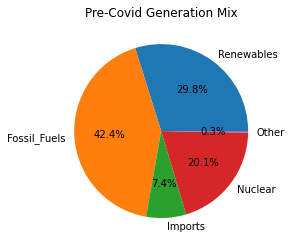

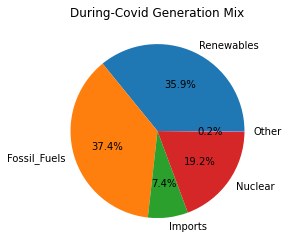

In [3]:
copy19_mean = copy19.mean()
copy20_mean = copy20.mean()
gen_labels=list(copy19_mean.index)

values=list(copy19_mean.values)
plt.figure() 
p = plt.pie(values, labels=gen_labels, autopct='%1.1f%%')
plt.title("Pre-Covid Generation Mix")

values=list(copy20_mean.values)
plt.figure() 
p = plt.pie(values, labels=gen_labels, autopct='%1.1f%%')
plt.title("During-Covid Generation Mix")
plt.show()

Looking at both pie charts, we can see that between Pre-Covid and During-Covid:
   - 'Imports' does not change. This is to be expected along with 'Other and 'Nuclear' having nearly the exact same % contribution to energy generation.
   - We can see that 'Fossil_Fuels' during Covid contributed to the energy generation by 5% less, while 'Renewables' contributed by 6.1% more. This is the biggest effect that COVID-19 has had on the generation mix and there are several factors that could contribute to this.

In [4]:
copy19_hour = copy19.groupby(pd.to_datetime(copy19.Date).dt.hour).mean()
copy20_hour = copy20.groupby(pd.to_datetime(copy20.Date).dt.hour).mean()

copy19_day = copy19.groupby(pd.to_datetime(copy19.Date).dt.dayofweek).mean()
copy20_day = copy20.groupby(pd.to_datetime(copy20.Date).dt.dayofweek).mean()

copy19_month = copy19.groupby(pd.to_datetime(copy19.Date).dt.month).mean()
copy20_month = copy20.groupby(pd.to_datetime(copy20.Date).dt.month).mean()

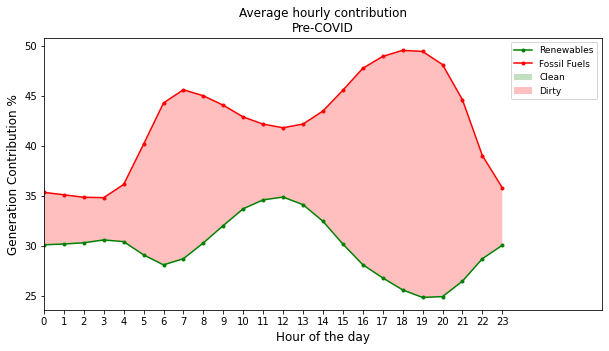

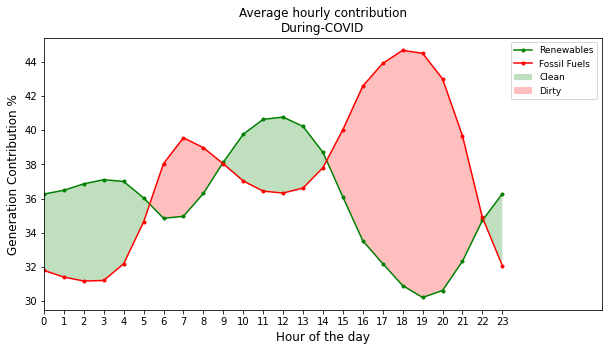

In [5]:
# Get data prepared for plotting
hour19=list(copy19_hour.index)
rnw19h=list(copy19_hour['Renewables'].values)
ff19h=list(copy19_hour['Fossil_Fuels'].values)

hour20=list(copy20_hour.index)
rnw20h=list(copy20_hour['Renewables'].values)
ff20h=list(copy20_hour['Fossil_Fuels'].values)


# 2019 Renewables VS Fossil Fuels
plt.figure(figsize=(10,5))

plt.plot(hour19, rnw19h, label='Renewables', marker='.', color='green')
plt.plot(hour19, ff19h, label='Fossil Fuels', marker='.', color='red')
rnw = np.array(rnw19h)
ff = np.array(ff19h)
plt.fill_between(hour19, rnw19h, ff19h, where=(rnw >= ff), facecolor='green', alpha=0.25, interpolate=True, label='Clean')
plt.fill_between(hour19, rnw19h, ff19h, where=(ff >= rnw), facecolor='red', alpha=0.25, interpolate=True, label='Dirty')

plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Average hourly contribution\nPre-COVID", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(0, 24))
plt.xlim(0, 28)
plt.margins(x=0)
plt.show()


# 2020 Renewables VS Fossil Fuels
plt.figure(figsize=(10,5))

plt.plot(hour20, rnw20h, label='Renewables', marker='.', color='green')
plt.plot(hour20, ff20h, label='Fossil Fuels', marker='.', color='red')
rnw = np.array(rnw20h)
ff = np.array(ff20h)
plt.fill_between(hour20, rnw20h, ff20h, where=(rnw >= ff), facecolor='green', alpha=0.25, interpolate=True, label='Clean')
plt.fill_between(hour20, rnw20h, ff20h, where=(ff >= rnw), facecolor='red', alpha=0.25, interpolate=True, label='Dirty')

plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Average hourly contribution\nDuring-COVID", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(0, 24))
plt.xlim(0, 28)
plt.margins(x=0)
plt.show()

From comparing the two plots of Renewable VS Fossil Fuel generation contribution there are two things we can spot straight away
    - Pre-covid: This plot contains now green shading. This meant that there were 0% of the hours in a day where Renewables contributed to energy generation more than Fossil Fuels.
    - During-covid: Looking at this plot, there were roughly 11-12 hours (46%-50%) during the day where Renewables contributed to energy generation more than Fossil Fuels. 

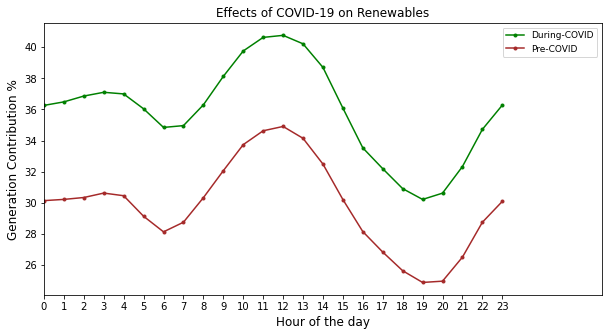

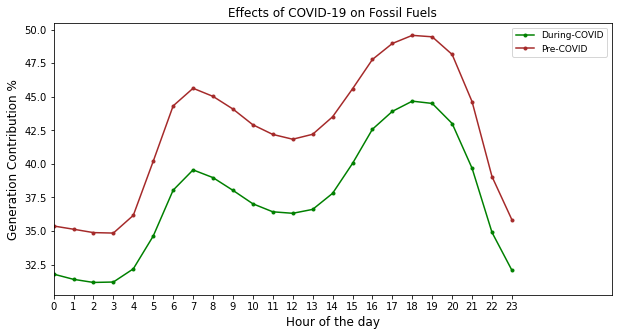

In [6]:
plt.figure(figsize=(10,5))

plt.plot(hour20, rnw20h, label='During-COVID', marker='.', color='green')
plt.plot(hour19, rnw19h, label='Pre-COVID', marker='.', color='brown')
plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Effects of COVID-19 on Renewables", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(0, 24))
plt.xlim(0, 28)
plt.margins(x=0)

plt.figure(figsize=(10,5))

plt.plot(hour20, ff20h, label='During-COVID', marker='.', color='green')
plt.plot(hour19, ff19h, label='Pre-COVID', marker='.', color='brown')
plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Effects of COVID-19 on Fossil Fuels", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(0, 24))
plt.xlim(0, 28)
plt.margins(x=0)

plt.show()

Looking at the two plots we can see that COVID-19:
    - Increased Renewables energy generation contribution during-COVID throughout all hours of the day compared to pre-COVID
    - Decreased Fossil Fuel energy generation contribution during-COVID throughout all hours of the day compared to pre-COVID

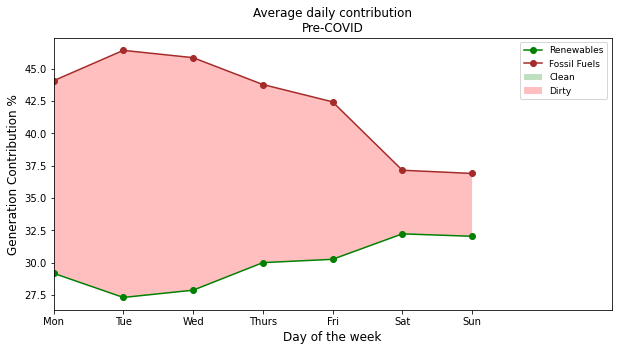

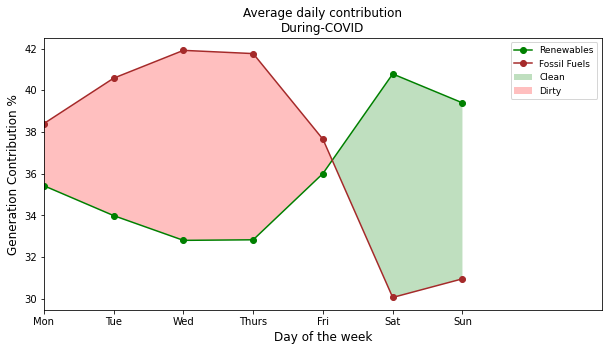

In [7]:
day19=list(copy19_day.index)
rnw19d=list(copy19_day['Renewables'].values)
ff19d=list(copy19_day['Fossil_Fuels'].values)

day20=list(copy20_day.index)
rnw20d=list(copy20_day['Renewables'].values)
ff20d=list(copy20_day['Fossil_Fuels'].values)


# 2019 Renewables VS Fossil Fuels
plt.figure(figsize=(10,5))
plt.plot(day19, rnw19d, label='Renewables', marker='o', color='green')
plt.plot(day19, ff19d, label='Fossil Fuels', marker='o', color='brown')
rnw = np.array(rnw19d)
ff = np.array(ff19d)
plt.fill_between(day19, rnw19d, ff19d, where=(rnw >= ff), facecolor='green', alpha=0.25, interpolate=True, label='Clean')
plt.fill_between(day19, rnw19d, ff19d, where=(ff >= rnw), facecolor='red', alpha=0.25, interpolate=True, label='Dirty')

plt.xlabel("Day of the week", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Average daily contribution\nPre-COVID", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(0, 7), ('Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
plt.xlim(0, 8)
plt.margins(x=0)

# 2020 Renewables VS Fossil Fuels
plt.figure(figsize=(10,5))
plt.plot(day20, rnw20d, label='Renewables', marker='o', color='green')
plt.plot(day20, ff20d, label='Fossil Fuels', marker='o', color='brown')
rnw = np.array(rnw20d)
ff = np.array(ff20d)
plt.fill_between(day20, rnw20d, ff20d, where=(rnw >= ff), facecolor='green', alpha=0.25, interpolate=True, label='Clean')
plt.fill_between(day20, rnw20d, ff20d, where=(ff >= rnw), facecolor='red', alpha=0.25, interpolate=True, label='Dirty')

plt.xlabel("Day of the week", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Average daily contribution\nDuring-COVID", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(0, 7), ('Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
plt.xlim(0, 8)
plt.margins(x=0)
plt.show()

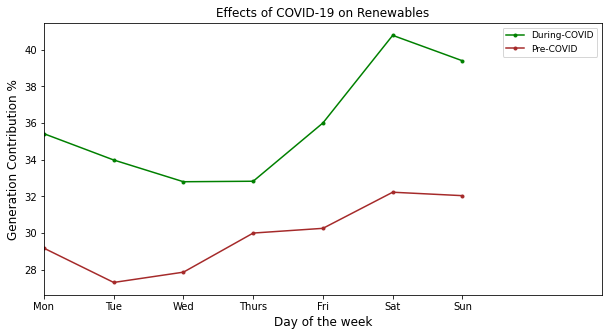

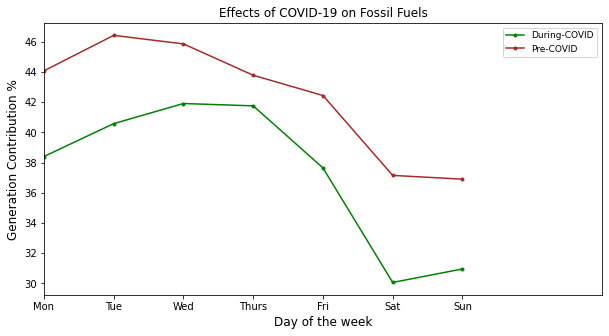

In [8]:
plt.figure(figsize=(10,5))

plt.plot(day20, rnw20d, label='During-COVID', marker='.', color='green')
plt.plot(day19, rnw19d, label='Pre-COVID', marker='.', color='brown')
plt.xlabel("Day of the week", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Effects of COVID-19 on Renewables", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(0, 7), ('Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
plt.xlim(0, 8)
plt.margins(x=0)

plt.figure(figsize=(10,5))

plt.plot(day20, ff20d, label='During-COVID', marker='.', color='green')
plt.plot(day19, ff19d, label='Pre-COVID', marker='.', color='brown')
plt.xlabel("Day of the week", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Effects of COVID-19 on Fossil Fuels", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(0, 7), ('Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
plt.xlim(0, 8)
plt.margins(x=0)

plt.show()

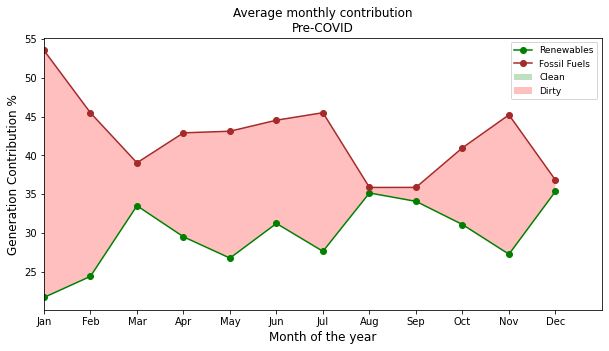

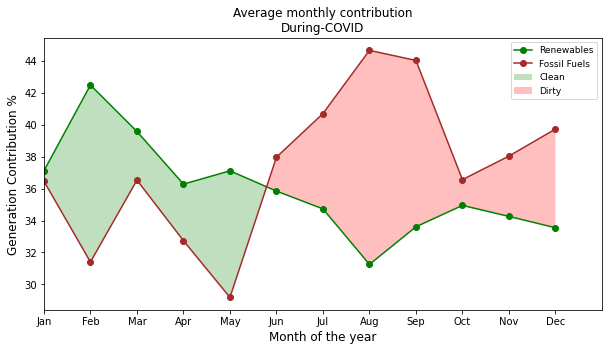

In [9]:
month19=list(copy19_month.index)
rnw19m=list(copy19_month['Renewables'].values)
ff19m=list(copy19_month['Fossil_Fuels'].values)

month20=list(copy20_month.index)
rnw20m=list(copy20_month['Renewables'].values)
ff20m=list(copy20_month['Fossil_Fuels'].values)

# 2019 Renewables VS Fossil Fuels
plt.figure(figsize=(10,5))
plt.plot(month19, rnw19m, label='Renewables', marker='o', color='green')
plt.plot(month19, ff19m, label='Fossil Fuels', marker='o', color='brown')
rnw = np.array(rnw19m)
ff = np.array(ff19m)
plt.fill_between(month19, rnw19m, ff19m, where=(rnw >= ff), facecolor='green', alpha=0.25, interpolate=True, label='Clean')
plt.fill_between(month19, rnw19m, ff19m, where=(ff >= rnw), facecolor='red', alpha=0.25, interpolate=True, label='Dirty')

plt.xlabel("Month of the year", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Average monthly contribution\nPre-COVID", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.xlim(1, 13)
plt.margins(x=0)

# 2020 Renewables VS Fossil Fuels
plt.figure(figsize=(10,5))
plt.plot(month20, rnw20m, label='Renewables', marker='o', color='green')
plt.plot(month20, ff20m, label='Fossil Fuels', marker='o', color='brown')
rnw = np.array(rnw20m)
ff = np.array(ff20m)
plt.fill_between(month20, rnw20m, ff20m, where=(rnw >= ff), facecolor='green', alpha=0.25, interpolate=True, label='Clean')
plt.fill_between(month20, rnw20m, ff20m, where=(ff >= rnw), facecolor='red', alpha=0.25, interpolate=True, label='Dirty')

plt.xlabel("Month of the year", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Average monthly contribution\nDuring-COVID", fontsize=12)
plt.legend(loc='upper right', prop={'size': 9})
plt.xticks(range(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.xlim(1, 13)
plt.margins(x=0)
plt.show()

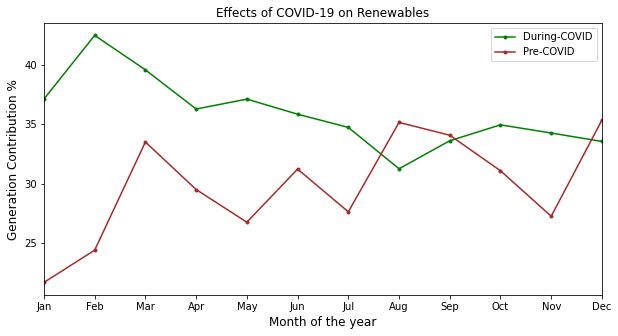

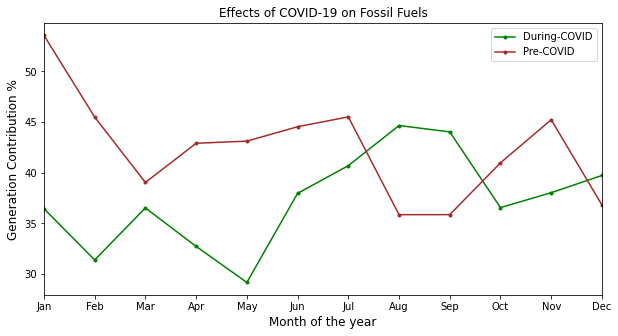

In [10]:
plt.figure(figsize=(10,5))
plt.plot(month20, rnw20m, label='During-COVID', marker='.', color='green')
plt.plot(month19, rnw19m, label='Pre-COVID', marker='.', color='brown')
plt.xlabel("Month of the year", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Effects of COVID-19 on Renewables", fontsize=12)
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks(range(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.margins(x=0)

plt.figure(figsize=(10,5))
plt.plot(month20, ff20m, label='During-COVID', marker='.', color='green')
plt.plot(month19, ff19m, label='Pre-COVID', marker='.', color='brown')
plt.xlabel("Month of the year", fontsize=12)
plt.ylabel("Generation Contribution %", fontsize=12)
plt.title("Effects of COVID-19 on Fossil Fuels", fontsize=12)
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks(range(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.margins(x=0)

plt.show()